In [1]:
#Importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt#visualisation
import matplotlib.style as style
%matplotlib inline 
sns.set(color_codes=True)
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")




In [2]:
#load dataset
dataset = pd.DataFrame(pd.read_excel('Sample-Superstore.xlsx')) 
dataset.head()
dataset.dtypes
dataset.shape #check number of rows and columns 
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [3]:
#Check for duplicates
Duplicat_rows_data = dataset[dataset.duplicated()]
print("Number of duplicated rows:", len(Duplicat_rows_data))

#check nulls
dataset.isnull().sum()


('Number of duplicated rows:', 0)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### EDA

Text(0.5,1,'Profit ranges')

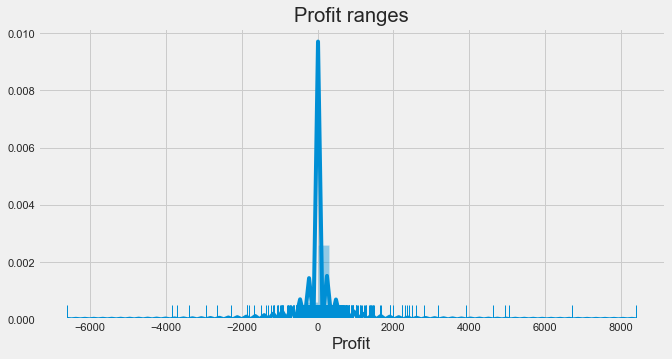

In [4]:
style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(dataset.Profit, rug = True).set_title('Profit ranges')

Box Plot for Profit


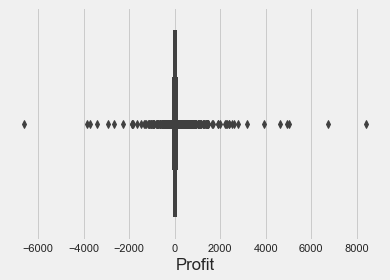

In [5]:
print("Box Plot for Profit")
sns.boxplot(x = dataset['Profit'])

Text(0.5,1,'Sales ranges')

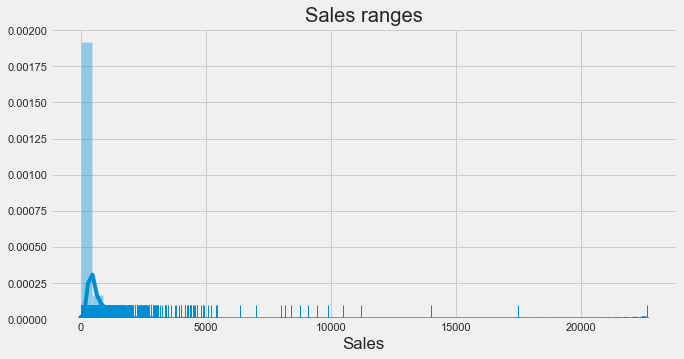

In [6]:
style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(dataset.Sales, rug = True).set_title('Sales ranges')

Box plot for Sales


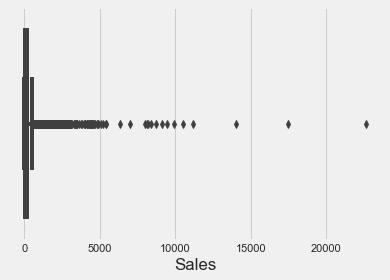

In [7]:
#Box plots
print("Box plot for Sales")
sns.boxplot(x = dataset['Sales'])

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


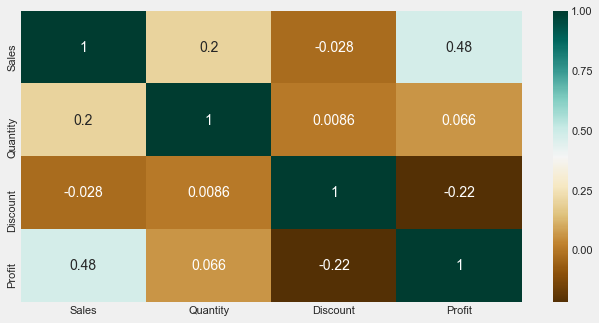

In [8]:
# Finding the relations between the variables
plt.figure(figsize=(10,5))
viz= dataset[["Sales","Quantity","Discount","Profit"]].corr()
sns.heatmap(viz,cmap='BrBG',annot=True)
viz

#the output shows realtionship between the variable sales and profit and between Sales and quantity


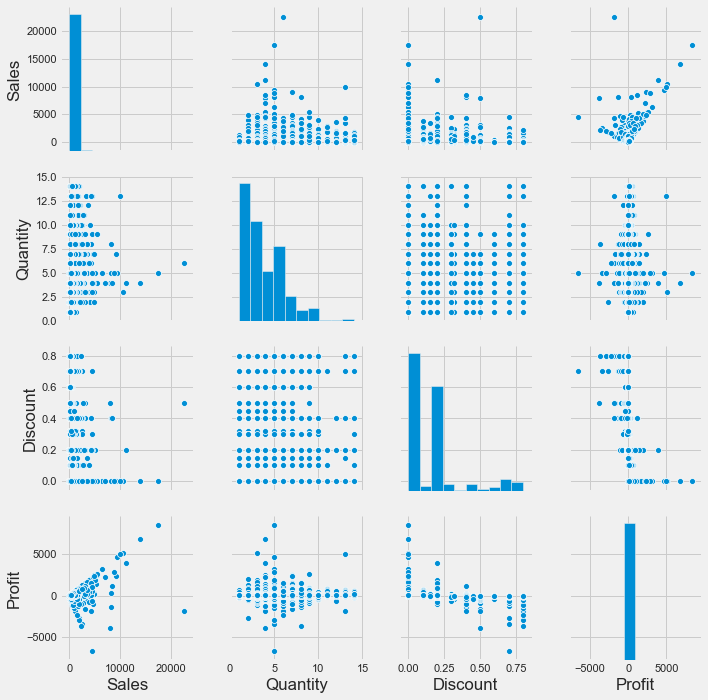

In [9]:
#scatter plot
sns.pairplot(dataset[["Sales","Quantity","Discount","Profit"]], kind="scatter")
plt.show()

#Sales and profit
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(dataset["Sales"], dataset["Profit"])
# ax.set_xlabel("Sales")
# ax.set_ylabel("Profit")
# plt.show()

In [10]:
#Relation between sales and profit
#Null hypothesis = relationship between sales and profit is not significant
linregress(dataset["Sales"],dataset["Profit"])


LinregressResult(slope=0.18006666409227598, intercept=-12.732867116682769, rvalue=0.47906434973770584, pvalue=0.0, stderr=0.0033006450818068777)

In [11]:
#Relation between sales and quantity
#Null hypothesis = relationship between sales and quantity is not significant
linregress(dataset["Sales"],dataset["Quantity"]) # p value is less than 0.05 so we reject the null hypothesis


LinregressResult(slope=0.0007168775034892684, intercept=3.624793714454146, rvalue=0.20079477137389765, pvalue=2.019934871459207e-91, stderr=3.498886799202061e-05)

In [12]:
#Relation between quantity and profit
#Null hypothesis = relationship between quantity and profit is not significant
linregress(dataset["Profit"],dataset["Quantity"]) # p value is less than 0.05 so we reject the null hypothesis

LinregressResult(slope=0.0006293031051789311, intercept=3.771539870415268, rvalue=0.06625318912428488, pvalue=3.36170941589506e-11, stderr=9.481381276636258e-05)

In [13]:
#Relation between discount and profit
#Null hypothesis = relationship between discount and profit is not significant
linregress(dataset["Profit"],dataset["Discount"]) # p value is less than 0.05 so we reject the null hypothesis

LinregressResult(slope=-0.00019343292260751293, intercept=0.161745908838655, rvalue=-0.21948745637176814, pvalue=2.7022944361996077e-109, stderr=8.601478096503137e-06)

##### Analyzing Categorical Variables

In [14]:
dataset["Category"].value_counts() #one hot encoding

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [15]:
dataset["Region"].value_counts() #one hot encoding

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [16]:
dataset["Ship Mode"].value_counts() #rank

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [17]:
dataset["State"].value_counts() #count encoding

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

##### Remove unwanted cols

In [18]:

drop_cols = ["Row ID", "Order ID","Order Date","Ship Date","State", "Customer ID", "Customer Name","Segment", "Country", "City","Postal Code", "Product ID", "Sub-Category","Product Name"]
df = dataset.copy().drop(drop_cols, axis = 1)
df.head()


,Ship Mode,Region,Category,Sales,Quantity,Discount,Profit
0,Second Class,South,Furniture,261.9600,2,0.00,41.9136
1,Second Class,South,Furniture,731.9400,3,0.00,219.5820
2,Second Class,West,Office Supplies,14.6200,2,0.00,6.8714
3,Standard Class,South,Furniture,957.5775,5,0.45,-383.0310
4,Standard Class,South,Office Supplies,22.3680,2,0.20,2.5164


#### Splitting data as training and testing

In [19]:
X = df.copy().drop('Profit', axis = 1)
Y = df['Profit'].copy()

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)


#### Encoding Categorical Variables

In [20]:
#Functions to perform one hot encoding and Label encoding

def DummyEncodeCols(X_Data, ColoumName):
    dum_df = pd.get_dummies(X_Data,columns= ColoumName, prefix= ColoumName, dummy_na = False)
    return dum_df

def OrdinalEncoding(X_data):
    Ship_Mode_Mapper = {"Standard Class":1,"Second Class":2, "First Class":3, "Same Day":4}
    X_data["Ship Mode"] = X_data["Ship Mode"].replace(Ship_Mode_Mapper)
    return X_data

In [21]:
#One hot encoding
Columns_to_encode = ["Region","Category"]
xTrain_Encoded = DummyEncodeCols(xTrain,Columns_to_encode)

#Label encoding
xTrain_Encoded = OrdinalEncoding(xTrain_Encoded)


#### Standarization

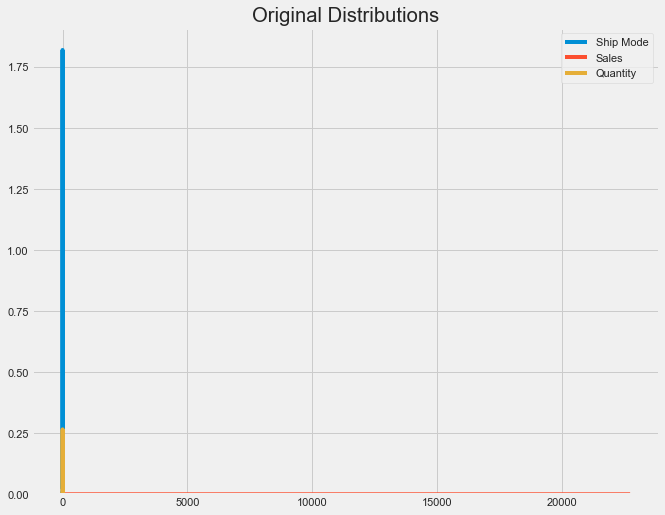

In [22]:
#Check to see if standarization is needed

# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(xTrain_Encoded['Ship Mode'], ax=ax1)
sns.kdeplot(xTrain_Encoded['Sales'], ax=ax1)
sns.kdeplot(xTrain_Encoded['Quantity'], ax=ax1)




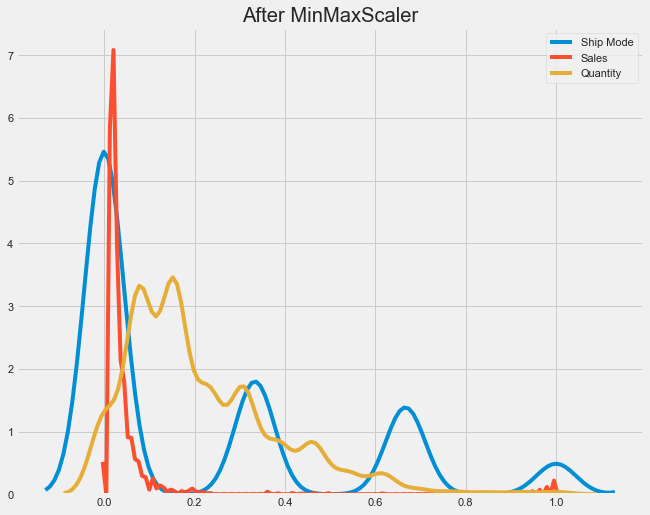

In [23]:
#Applying minmaxScaler

mm_scaler = preprocessing.MinMaxScaler()
df_Encode_mm = mm_scaler.fit_transform(xTrain_Encoded.copy())
col_names=list(xTrain_Encoded.columns)

Encode_MM_X_train = pd.DataFrame(df_Encode_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(Encode_MM_X_train['Ship Mode'], ax=ax1)
sns.kdeplot(Encode_MM_X_train['Sales'], ax=ax1)
sns.kdeplot(Encode_MM_X_train['Quantity'], ax=ax1)


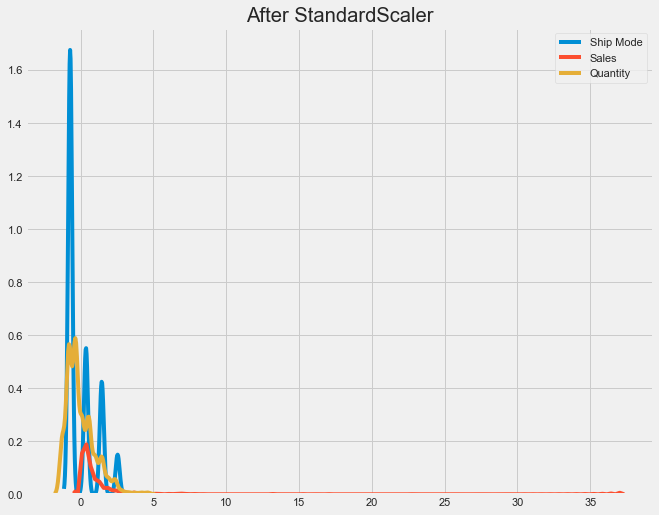

In [24]:
#StandardScaler

s_scaler = preprocessing.StandardScaler()
df_Encode_Standard = s_scaler.fit_transform(xTrain_Encoded.copy())

col_names=list(xTrain_Encoded.columns)

Encode_Standard_X_train = pd.DataFrame(df_Encode_Standard, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(Encode_Standard_X_train['Ship Mode'], ax=ax1)
sns.kdeplot(Encode_Standard_X_train['Sales'], ax=ax1)
sns.kdeplot(Encode_Standard_X_train['Quantity'], ax=ax1)


Text(0.5,1,'Profit After StandardScalar')

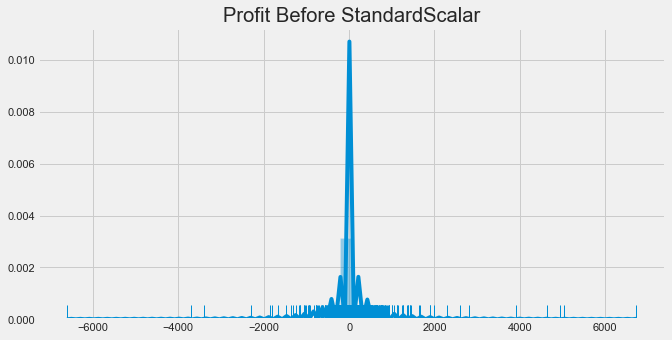

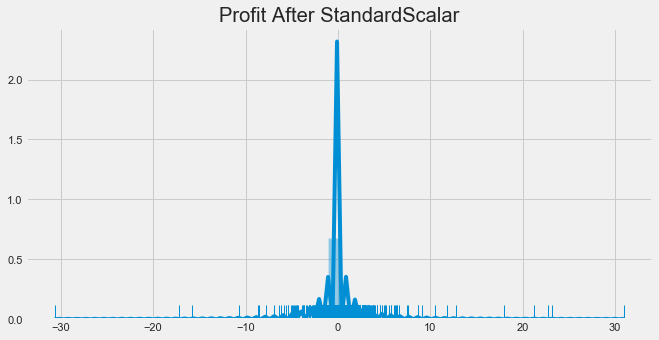

In [25]:
#Standarizing Profits

style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(yTrain.values, rug = True).set_title('Profit Before StandardScalar')

Standard_Y_train = s_scaler.fit_transform(pd.DataFrame(yTrain) )

style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(Standard_Y_train, rug = True).set_title('Profit After StandardScalar')


##### Fit Linear Model

In [26]:

#Running the linear regression model
regressor = LinearRegression()  
regressor.fit(Encode_Standard_X_train, Standard_Y_train)

#feature coefficients
features = pd.DataFrame({"Feature":Encode_Standard_X_train.columns,"Coefficients":regressor.coef_[0]})
features.Coefficients = features.Coefficients.abs() #ignoring the sign as sign states inverse relationship
features = features.sort_values(by=['Coefficients'],ascending=False)
features


,Coefficients,Feature
1,0.437388,Sales
3,0.218757,Discount
8,0.055660,Category_Furniture
9,0.029876,Category_Office Supplies
2,0.021406,Quantity
10,0.020574,Category_Technology
0,0.015866,Ship Mode
4,0.015603,Region_Central
7,0.007799,Region_West
6,0.005496,Region_South


#### Testing model


In [27]:
#Encoding test data
xTest_Encoded = DummyEncodeCols(xTest,Columns_to_encode)
xTest_Encoded = OrdinalEncoding(xTest_Encoded)



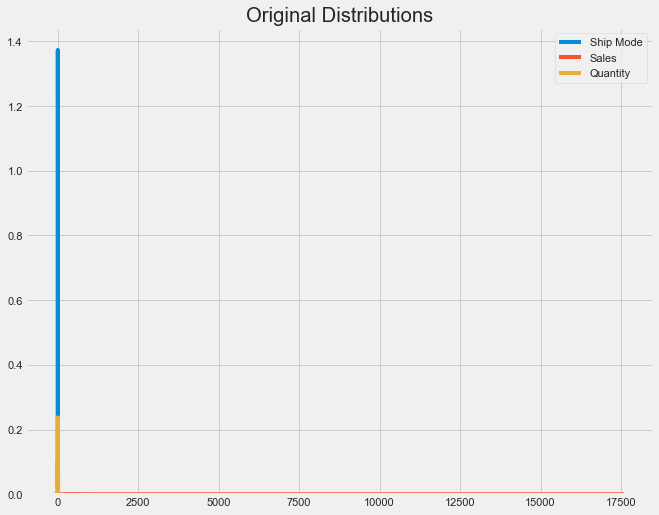

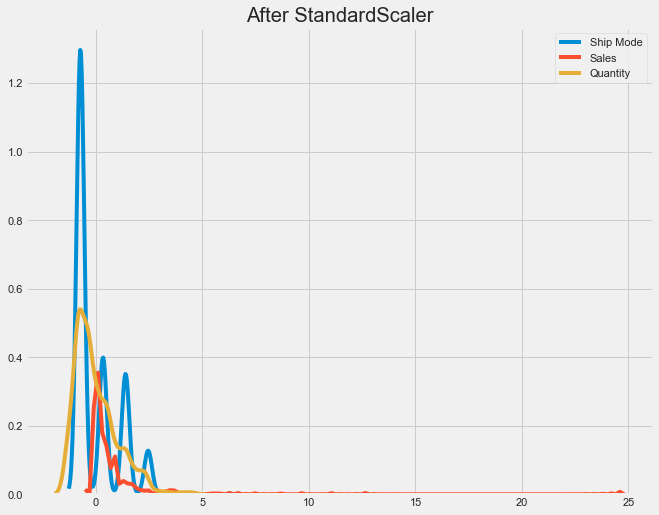

In [28]:
#Standarization of test data
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(xTest_Encoded['Ship Mode'], ax=ax1)
sns.kdeplot(xTest_Encoded['Sales'], ax=ax1)
sns.kdeplot(xTest_Encoded['Quantity'], ax=ax1)


s_scaler1 = preprocessing.StandardScaler()
df_Encode_Standard1 = s_scaler1.fit_transform(xTest_Encoded.copy())

col_names=list(xTrain_Encoded.columns)

Encode_Standard_xtest = pd.DataFrame(df_Encode_Standard1, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(Encode_Standard_xtest['Ship Mode'], ax=ax1)
sns.kdeplot(Encode_Standard_xtest['Sales'], ax=ax1)
sns.kdeplot(Encode_Standard_xtest['Quantity'], ax=ax1)


Text(0.5,1,'Profit After StandardScalar')

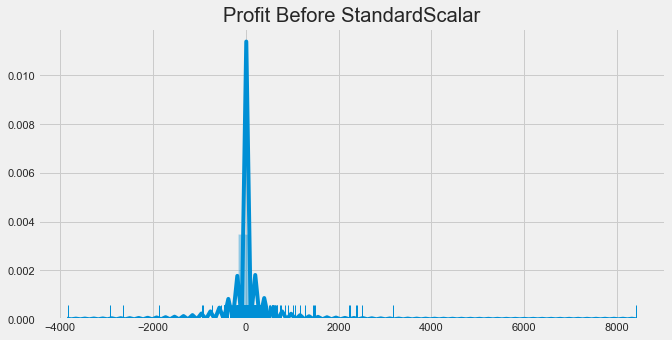

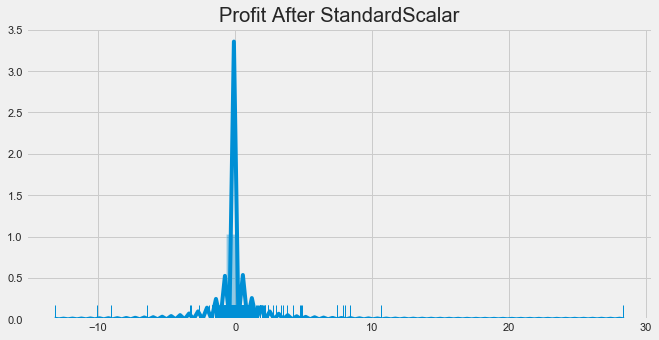

In [29]:

style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(yTest.values, rug = True).set_title('Profit Before StandardScalar')


Standard_yTest = s_scaler.fit_transform(pd.DataFrame(yTest) )
style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
sns.distplot(Standard_yTest, rug = True).set_title('Profit After StandardScalar')



In [30]:
#predicting

y_pred = regressor.predict(Encode_Standard_xtest)

#compare the actual values with predicted values
df = pd.DataFrame({'Actual': Standard_yTest.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)


,Actual,Predicted
0,-0.079008,0.057727
1,-0.085570,0.107713
2,-0.109641,-0.138335
3,-0.058455,-0.217089
4,-0.096756,-0.142041
5,-0.074623,-0.144825
6,-0.031565,-0.114495
7,0.851909,1.029386
8,-0.297826,-0.309558
9,2.965163,2.179721


In [31]:
df_Inverse_standard = pd.DataFrame({'Actual': s_scaler.inverse_transform(Standard_yTest.flatten()), 'Predicted': s_scaler.inverse_transform( y_pred.flatten())})

df_Inverse_standard.head(10)

,Actual,Predicted
0,11.6800,52.029102
1,9.7438,66.779416
2,2.6406,-5.826590
3,17.7450,-29.066077
4,6.4428,-6.920393
5,12.9740,-7.741840
6,25.6800,1.208331
7,286.3836,338.754992
8,-52.8908,-56.352664
9,909.9818,678.206496


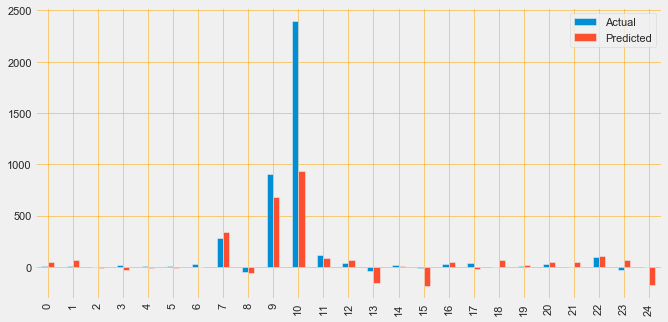

In [32]:
df1 = df_Inverse_standard.head(25)
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluating Model Performance


In [33]:
print('R score:',r2_score(Standard_yTest,y_pred)) #higher R score is better
print('Mean Absolute Error:', metrics.mean_absolute_error(Standard_yTest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Standard_yTest, y_pred))  


('R score:', 0.3799477347944772)
('Mean Absolute Error:', 0.23393024523236738)
('Mean Squared Error:', 0.6200522652055228)


In [34]:
def GetMAEWithOriginalValues(ActualValues,PredictedValues):
    x = s_scaler.inverse_transform(ActualValues.flatten())
    y =  s_scaler.inverse_transform(PredictedValues.flatten())
    print('Mean Absolute Error of inverse standard:', metrics.mean_absolute_error(x,y))

In [35]:
GetMAEWithOriginalValues(Standard_yTest,y_pred)
#model predictions are off by approximately $69.03

('Mean Absolute Error of inverse standard:', 69.03027732074915)


In [36]:
#Removing the less significant variables and running the  model
#Remove region and shipping mode and training the model

Encode_Standard_X_train_2 = Encode_Standard_X_train[['Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology']]
regressor_2 = LinearRegression()  
regressor_2.fit(Encode_Standard_X_train_2, Standard_Y_train)



features_1 = pd.DataFrame({"Feature":Encode_Standard_X_train_2.columns,"Coefficients":regressor_2.coef_[0]})
features_1.Coefficients = features.Coefficients.abs() #ignoring the sign as sign states inverse relationship
features_1 = features_1.sort_values(by=['Coefficients'],ascending=False)
features_1


,Coefficients,Feature
1,0.437388,Discount
3,0.218757,Category_Office Supplies
2,0.021406,Category_Furniture
0,0.015866,Sales
4,0.015603,Category_Technology


In [37]:
#Predicting
Encode_Standard_xtest_2 = Encode_Standard_xtest[['Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology']].copy()
y_pred_2 = regressor_2.predict(Encode_Standard_xtest_2)

#compare the actual values with predicted values
df_2 = pd.DataFrame({'Actual': Standard_yTest.flatten(), 'Predicted': y_pred_2.flatten()})
df_2.head(10)


,Actual,Predicted
0,-0.079008,0.066115
1,-0.085570,0.065682
2,-0.109641,-0.135289
3,-0.058455,-0.176860
4,-0.096756,-0.144805
5,-0.074623,-0.132375
6,-0.031565,-0.114708
7,0.851909,1.035816
8,-0.297826,-0.380996
9,2.965163,2.213889


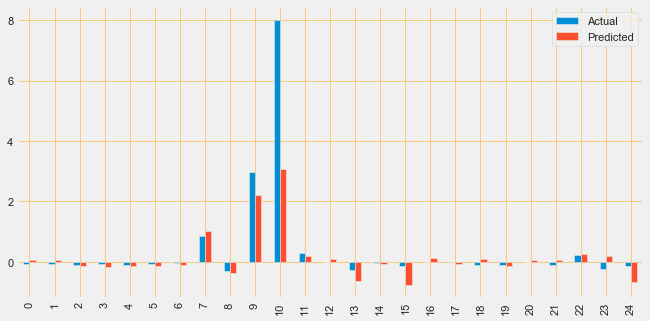

In [38]:
df2_1 = df_2.head(25)
df2_1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [39]:
df_test = pd.DataFrame({'Actual': Standard_yTest.flatten(), 'Predicted_1': y_pred.flatten(),'Predicted_2': y_pred_2.flatten()})
df_test.head(10)

,Actual,Predicted_1,Predicted_2
0,-0.079008,0.057727,0.066115
1,-0.085570,0.107713,0.065682
2,-0.109641,-0.138335,-0.135289
3,-0.058455,-0.217089,-0.176860
4,-0.096756,-0.142041,-0.144805
5,-0.074623,-0.144825,-0.132375
6,-0.031565,-0.114495,-0.114708
7,0.851909,1.029386,1.035816
8,-0.297826,-0.309558,-0.380996
9,2.965163,2.179721,2.213889


In [40]:
#Evaluating model
print('R score:',r2_score(Standard_yTest,y_pred_2)) #higher R score is better
print('Mean Absolute Error:', metrics.mean_absolute_error(Standard_yTest, y_pred_2))
print('Mean Squared Error:', metrics.mean_squared_error(Standard_yTest, y_pred_2))  

#The model performance is not showing much difference even after removing less significant variables

('R score:', 0.37819758098358336)
('Mean Absolute Error:', 0.23270189045266365)
('Mean Squared Error:', 0.6218024190164166)


### Regularization

#### Ridge

In [47]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

#ridge regression

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,110,120,130,140,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(Encode_Standard_X_train, Standard_Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 110, 120, 130, 140, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [46]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_) 

{'alpha': 150}
-0.8067257171717246


#### Lasso

In [50]:
lasso=Lasso()

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(Encode_Standard_X_train, Standard_Y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-0.8073658682683267


#### Prediction

In [51]:
prediction_lasso=lasso_regressor.predict(Encode_Standard_xtest)
prediction_ridge=ridge_regressor.predict(Encode_Standard_xtest)

In [59]:
lasso_df = pd.DataFrame({'Actual': Standard_yTest.flatten(), 'Predicted': prediction_lasso.flatten()})
lasso_df.head(10)
print('R score:',r2_score(Standard_yTest,prediction_lasso)) #higher R score is better
print('Mean Absolute Error:', metrics.mean_absolute_error(Standard_yTest, prediction_lasso))
print('Mean Squared Error:', metrics.mean_squared_error(Standard_yTest, prediction_lasso))  

('R score:', 0.3756229156609644)
('Mean Absolute Error:', 0.22616242026428873)
('Mean Squared Error:', 0.6243770843390356)


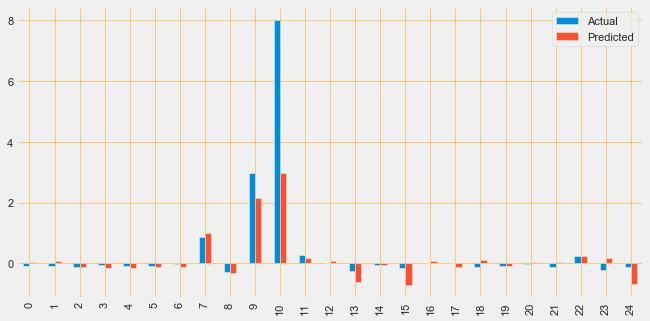

In [60]:
lasso_df = lasso_df.head(25)
lasso_df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

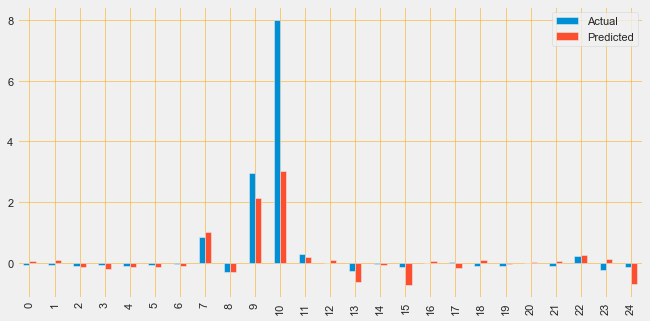

In [62]:
#Ridge
ridge_df = pd.DataFrame({'Actual': Standard_yTest.flatten(), 'Predicted': prediction_ridge.flatten()})
ridge_df.head(10)
ridge_df = ridge_df.head(25)
ridge_df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [63]:
print('R score:',r2_score(Standard_yTest,prediction_ridge)) #higher R score is better
print('Mean Absolute Error:', metrics.mean_absolute_error(Standard_yTest, prediction_ridge))
print('Mean Squared Error:', metrics.mean_squared_error(Standard_yTest, prediction_ridge))  

('R score:', 0.3770375945068798)
('Mean Absolute Error:', 0.23201432584947201)
('Mean Squared Error:', 0.6229624054931202)
